## Background

Customer is an important resource of the enterprise, but aslo the intangible assets of the enterprise. The loss of customer means the loss of assets. Therefore, the churn prediction is very important. Preventing and avoiding the churn reduction to improve the profitability and competitveness of enterpriese.

This dataset collects data about the information of customers using TV service and the customers whether churn or not.

## Obejective

1. Identify the profile of customers that are likely to churn with available features.

2. Build modle that predict probability of whether customers will churn or not.

3. Build modle that clustering analysis, propose specific solutions for different types of churns.

In [6]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
from matplotlib import rcParams
import seaborn as sns 
plt.rcParams['font.sans-serif']=['Heiti TC']
plt.rcParams['axes.unicode_minus']=False
import warnings
warnings.filterwarnings("ignore")

# pyecharts
from pyecharts import options as opts
from pyecharts.charts import *

import itertools
from itertools import chain

from sklearn.preprocessing import  LabelEncoder,scale
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import  train_test_split
from sklearn.metrics import r2_score,mean_squared_error,accuracy_score,mean_absolute_error,mean_absolute_percentage_error

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

## Import Dataset

In [7]:
# Load "internet_service_churn.csv"
train_df = pd.read_csv('internet_service_churn.csv', 
                  header=0, sep=",")

## Dataset Information


In [9]:
train_df.shape
train_df.head(5)
train_df.info()

(72274, 11)

,id,is_tv_subscriber,is_movie_package_subscriber,subscription_age,bill_avg,reamining_contract,service_failure_count,download_avg,upload_avg,download_over_limit,churn
0,15,1,0,11.95,25,0.14,0,8.4,2.3,0,0
1,18,0,0,8.22,0,NaN,0,0.0,0.0,0,1
2,23,1,0,8.91,16,0.00,0,13.7,0.9,0,1
3,27,0,0,6.87,21,NaN,1,0.0,0.0,0,1
4,34,0,0,6.39,0,NaN,0,0.0,0.0,0,1


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72274 entries, 0 to 72273
Data columns (total 11 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   id                           72274 non-null  int64  
 1   is_tv_subscriber             72274 non-null  int64  
 2   is_movie_package_subscriber  72274 non-null  int64  
 3   subscription_age             72274 non-null  float64
 4   bill_avg                     72274 non-null  int64  
 5   reamining_contract           50702 non-null  float64
 6   service_failure_count        72274 non-null  int64  
 7   download_avg                 71893 non-null  float64
 8   upload_avg                   71893 non-null  float64
 9   download_over_limit          72274 non-null  int64  
 10  churn                        72274 non-null  int64  
dtypes: float64(4), int64(7)
memory usage: 6.1 MB


- A total of 72274 sample data, excluding the tag and ID columns which a total of 10 fetures.

## Null Values

In [10]:
train_df.isnull().sum()
train_df.nunique()
train_df.skew().sort_values(ascending=False)

id                                 0
is_tv_subscriber                   0
is_movie_package_subscriber        0
subscription_age                   0
bill_avg                           0
reamining_contract             21572
service_failure_count              0
download_avg                     381
upload_avg                       381
download_over_limit                0
churn                              0
dtype: int64

id                             72274
is_tv_subscriber                   2
is_movie_package_subscriber        2
subscription_age                1110
bill_avg                         179
reamining_contract               247
service_failure_count             19
download_avg                    2856
upload_avg                       802
download_over_limit                8
churn                              2
dtype: int64

upload_avg                     14.620348
download_avg                   14.580942
bill_avg                        7.358908
service_failure_count           5.592502
download_over_limit             5.269831
subscription_age                1.295647
is_movie_package_subscriber     0.700945
reamining_contract              0.401173
id                             -0.004863
churn                          -0.217850
is_tv_subscriber               -1.624711
dtype: float64

- reamining_contract has 21572 missing values which means the customers never opted for contract. The blank values can be filled with 0.

- download_avg and upload_avg has 381 missing values which can be dropped for better results.

In [11]:
# Data Cleaning
train_df = train_df.fillna(0)
train_df = train_df.drop_duplicates()

train_df.head(5)

,id,is_tv_subscriber,is_movie_package_subscriber,subscription_age,bill_avg,reamining_contract,service_failure_count,download_avg,upload_avg,download_over_limit,churn
0,15,1,0,11.95,25,0.14,0,8.4,2.3,0,0
1,18,0,0,8.22,0,0.00,0,0.0,0.0,0,1
2,23,1,0,8.91,16,0.00,0,13.7,0.9,0,1
3,27,0,0,6.87,21,0.00,1,0.0,0.0,0,1
4,34,0,0,6.39,0,0.00,0,0.0,0.0,0,1


## Exploratory Data Analysis

In [12]:
# distinguish category variables and numerical variables
col_cate = ["is_tv_subscriber","is_movie_package_subscriber","service_failure_count","download_over_limit","churn"]
col_num = ["subscription_age","bill_avg","reamining_contract","download_avg","upload_avg"]

is_tv_subscriber , Frequency of each feature：
 1    58922
0    13352
Name: is_tv_subscriber, dtype: int64


<Figure size 720x288 with 0 Axes>

<AxesSubplot:xlabel='is_tv_subscriber', ylabel='count'>

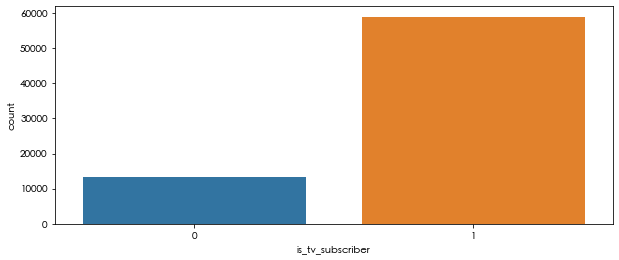

---------------------------------------------------------------------- 

is_movie_package_subscriber , Frequency of each feature：
 0    48089
1    24185
Name: is_movie_package_subscriber, dtype: int64


<Figure size 720x288 with 0 Axes>

<AxesSubplot:xlabel='is_movie_package_subscriber', ylabel='count'>

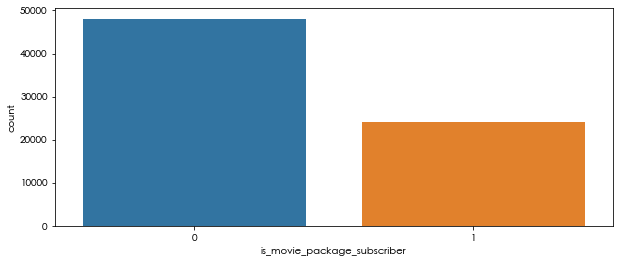

---------------------------------------------------------------------- 

service_failure_count , Frequency of each feature：
 0     60407
1      7665
2      2453
3       901
4       395
5       201
6        97
7        58
8        37
9        17
10       15
11        6
12        6
13        5
14        4
16        3
15        2
19        1
18        1
Name: service_failure_count, dtype: int64


<Figure size 720x288 with 0 Axes>

<AxesSubplot:xlabel='service_failure_count', ylabel='count'>

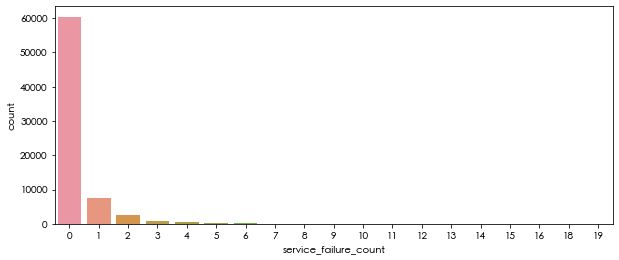

---------------------------------------------------------------------- 

download_over_limit , Frequency of each feature：
 0    68373
1      766
6      688
2      560
7      504
3      498
4      456
5      429
Name: download_over_limit, dtype: int64


<Figure size 720x288 with 0 Axes>

<AxesSubplot:xlabel='download_over_limit', ylabel='count'>

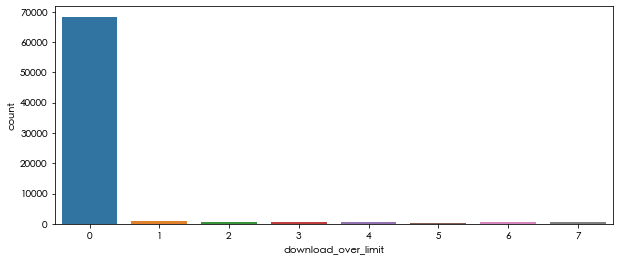

---------------------------------------------------------------------- 

churn , Frequency of each feature：
 1    40050
0    32224
Name: churn, dtype: int64


<Figure size 720x288 with 0 Axes>

<AxesSubplot:xlabel='churn', ylabel='count'>

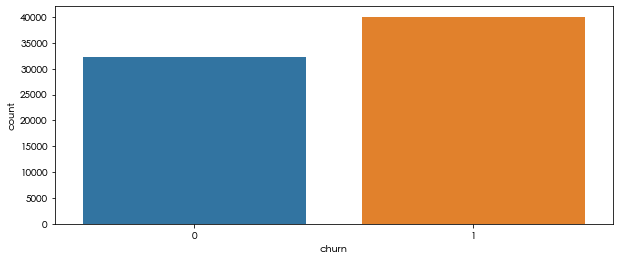

---------------------------------------------------------------------- 



In [13]:
# Exploratory Data Analysis (EDA) for col_cate
for i in col_cate:
    print(i, ", Frequency of each feature：\n", train_df[i].value_counts())
    plt.figure(figsize=(10,4)) 
    sns.countplot(x=i, data=train_df)
    plt.show()
    print("--" * 35, "\n")

array([[<AxesSubplot:title={'center':'subscription_age'}>,
        <AxesSubplot:title={'center':'bill_avg'}>],
       [<AxesSubplot:title={'center':'reamining_contract'}>,
        <AxesSubplot:title={'center':'download_avg'}>],
       [<AxesSubplot:title={'center':'upload_avg'}>, <AxesSubplot:>]],
      dtype=object)

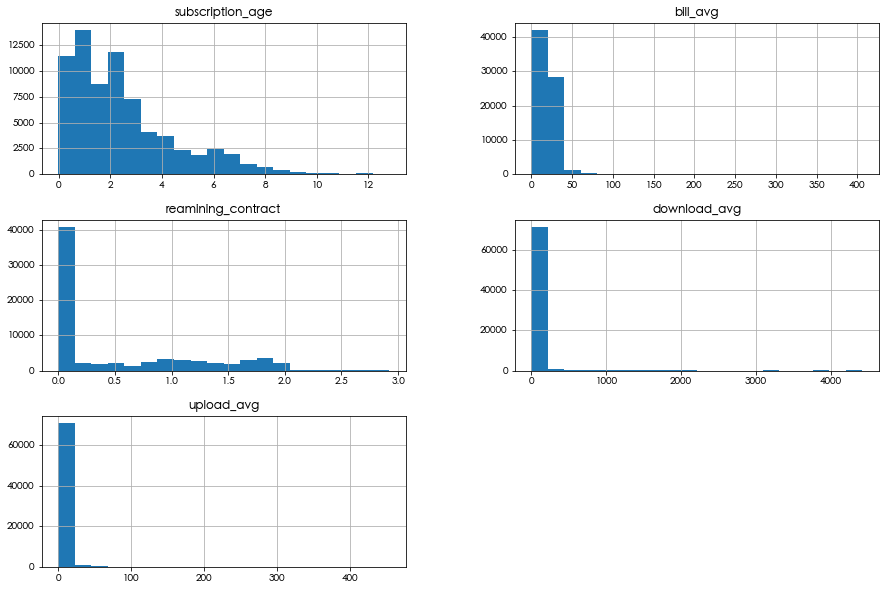

In [14]:
train_df[col_num].hist(bins=20, figsize=(15,10))

In [15]:
train_df.describe()

,id,is_tv_subscriber,is_movie_package_subscriber,subscription_age,bill_avg,reamining_contract,service_failure_count,download_avg,upload_avg,download_over_limit,churn
count,7.227400e+04,72274.000000,72274.000000,72274.000000,72274.000000,72274.000000,72274.000000,72274.000000,72274.000000,72274.000000,72274.000000
mean,8.463182e+05,0.815259,0.334629,2.450051,18.942483,0.502319,0.274234,43.459595,4.169977,0.207613,0.554141
std,4.891022e+05,0.388090,0.471864,2.034990,13.215386,0.669524,0.816621,63.317706,9.797685,0.997123,0.497064
min,1.500000e+01,0.000000,0.000000,-0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.222165e+05,1.000000,0.000000,0.930000,13.000000,0.000000,0.000000,6.400000,0.500000,0.000000,0.000000
50%,8.477840e+05,1.000000,0.000000,1.980000,19.000000,0.000000,0.000000,27.500000,2.100000,0.000000,1.000000
75%,1.269562e+06,1.000000,1.000000,3.300000,22.000000,1.040000,0.000000,60.200000,4.800000,0.000000,1.000000
max,1.689744e+06,1.000000,1.000000,12.800000,406.000000,2.920000,19.000000,4415.200000,453.300000,7.000000,1.000000


<Figure size 1440x576 with 0 Axes>

<AxesSubplot:>

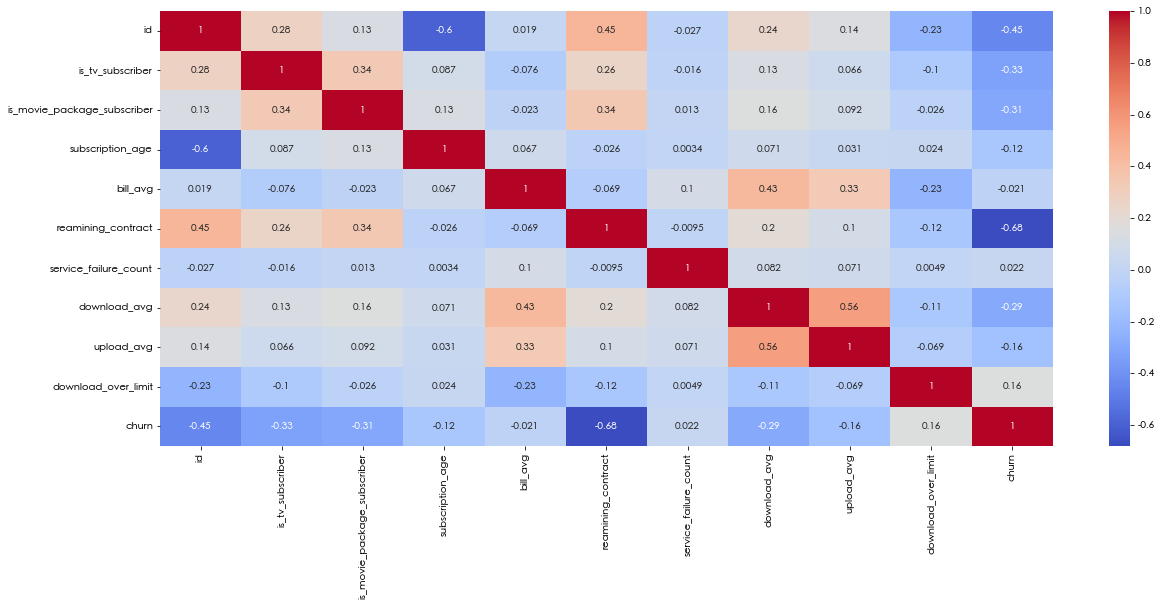

In [16]:
# heatmap to find correlation
corr = train_df.corr()
plt.figure(figsize=(20,8))
sns.heatmap(data=corr,xticklabels=corr.columns,
            yticklabels=corr.columns,annot=True,cmap="coolwarm")

## K-NN predict churn


In [17]:
X = train_df[['is_tv_subscriber', 'is_movie_package_subscriber', 'subscription_age', 'bill_avg', 'reamining_contract', 'service_failure_count', 'download_avg', 'upload_avg', 'download_over_limit']]
y = train_df[['churn']]

In [18]:
from sklearn.preprocessing import scale
X_scale = scale(X)
y = y.values

In [19]:
# Splitting the data into training and testing data in 70-30 randomly 
X_train,X_test,y_train,y_test = train_test_split(X_scale,y,test_size=0.3,random_state=888)

In [20]:
from sklearn.neighbors import KNeighborsClassifier
model_KNN = KNeighborsClassifier()
model_KNN.fit(X_train,y_train)
pre_KNN = model_KNN.predict(X_test)

KNeighborsClassifier()

,predict_churn
0,0
1,1
2,1
3,0
4,1


,number
predict_churn,
1,11901
0,9782


array([[<AxesSubplot:title={'center':'predict_churn'}>]], dtype=object)

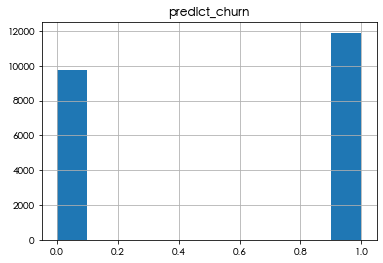

In [21]:
pre_KNN=pd.DataFrame(pre_KNN,columns=["predict_churn"]) 
pre_KNN.head() 
pd.DataFrame(pre_KNN.value_counts(),columns=["number"]) 
pre_KNN.hist() 

In [22]:
# K-NN Accuracy 
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test,pre_KNN))

0.9060093160540516


## Churn & Non-churn
- churn equal to 0, the number is 32224

- churn equal to 1, the number is 40050

In [23]:
con = pd.concat([pd.pivot_table(train_df,index=["churn"],values=["id"],aggfunc="count"),
                 pd.pivot_table(train_df,index=["churn"],aggfunc="mean").drop(["id"],axis=1)],axis=1)
con.rename(columns={"id" : "number"}) 

,number,bill_avg,download_avg,download_over_limit,is_movie_package_subscriber,is_tv_subscriber,reamining_contract,service_failure_count,subscription_age,upload_avg
churn,,,,,,,,,,
0,32224,19.252731,64.117565,0.031622,0.496214,0.956989,1.011077,0.254593,2.727828,5.912817
1,40050,18.692859,26.838312,0.349213,0.204619,0.701223,0.092976,0.290037,2.226554,2.767698


## K-Means

In [24]:
isChurn = train_df[train_df["churn"]==1]
isChurn = isChurn.reset_index(drop=True)
isChurn.head(5)

,id,is_tv_subscriber,is_movie_package_subscriber,subscription_age,bill_avg,reamining_contract,service_failure_count,download_avg,upload_avg,download_over_limit,churn
0,18,0,0,8.22,0,0.0,0,0.0,0.0,0,1
1,23,1,0,8.91,16,0.0,0,13.7,0.9,0,1
2,27,0,0,6.87,21,0.0,1,0.0,0.0,0,1
3,34,0,0,6.39,0,0.0,0,0.0,0.0,0,1
4,71,0,0,8.96,18,0.0,0,21.3,2.0,0,1


In [25]:
isChurn.describe()

,id,is_tv_subscriber,is_movie_package_subscriber,subscription_age,bill_avg,reamining_contract,service_failure_count,download_avg,upload_avg,download_over_limit,churn
count,4.005000e+04,40050.000000,40050.000000,40050.000000,40050.000000,40050.000000,40050.000000,40050.000000,40050.000000,40050.000000,40050.0
mean,6.483943e+05,0.701223,0.204619,2.226554,18.692859,0.092976,0.290037,26.838312,2.767698,0.349213,1.0
std,4.322926e+05,0.457727,0.403428,1.709438,13.073794,0.339111,0.865134,46.137197,7.932245,1.290545,0.0
min,1.800000e+01,0.000000,0.000000,-0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0
25%,2.863745e+05,0.000000,0.000000,0.980000,13.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0
50%,5.907300e+05,1.000000,0.000000,1.970000,20.000000,0.000000,0.000000,11.900000,0.900000,0.000000,1.0
75%,9.498655e+05,1.000000,0.000000,2.940000,23.000000,0.000000,0.000000,36.700000,2.900000,0.000000,1.0
max,1.689744e+06,1.000000,1.000000,12.800000,278.000000,2.310000,19.000000,1706.200000,327.200000,7.000000,1.0


## CMAST Model
For the actual meaning of those attributes, construct the churn model:

- C (Contract States) = reamining_contract  
- M (Consumption Amount) = download_avg + upload_avg + bill_avg  
- A (Activation) = is_tv_subscriber + is_movie_package_subscriber  
- S (Satisfaction) = service_failure_count + download_over_limit  
- T (Service Time) = subscription_age

In [75]:
cal = {
    "C": isChurn["reamining_contract"]
    ,"M": isChurn["download_avg"]+isChurn["upload_avg"]+isChurn["bill_avg"]
    ,"A": isChurn["is_tv_subscriber"]+isChurn["is_movie_package_subscriber"]
    ,"S": isChurn["service_failure_count"]+isChurn["download_over_limit"]
    ,"T": isChurn["subscription_age"]   
}

data_class = pd.DataFrame(data=cal,columns=["C","M","A","S","T"])
data_class

,C,M,A,S,T
0,0.00,0.0,0,0,8.22
1,0.00,30.6,1,0,8.91
2,0.00,21.0,0,1,6.87
3,0.00,0.0,0,0,6.39
4,0.00,41.3,0,0,8.96
...,...,...,...,...,...
40045,1.25,0.0,2,0,0.09
40046,1.63,1.8,1,0,0.06
40047,2.19,1.7,1,0,0.02
40048,0.72,0.0,0,0,0.01


In [76]:
data_class = pd.DataFrame(scale(data_class),columns=["C","M","A","S","T"])
data_class_ID = pd.concat([isChurn[["id"]],data_class],axis=1)
data_class

,C,M,A,S,T
0,-0.274177,-0.835332,-1.288250,-0.411060,3.506135
1,-0.274177,-0.306103,0.133906,-0.411060,3.909781
2,-0.274177,-0.472136,-1.288250,0.231974,2.716392
3,-0.274177,-0.835332,-1.288250,-0.411060,2.435594
4,-0.274177,-0.121046,-1.288250,-0.411060,3.939031
...,...,...,...,...,...
40045,3.411973,-0.835332,1.556063,-0.411060,-1.249873
40046,4.532562,-0.804201,0.133906,-0.411060,-1.267422
40047,6.183957,-0.805931,0.133906,-0.411060,-1.290822
40048,1.849045,-0.835332,-1.288250,-0.411060,-1.296672


In [77]:
# sklearn k-means
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

KMeans(n_clusters=2, random_state=888)

KMeans(n_clusters=3, random_state=888)

KMeans(n_clusters=4, random_state=888)

KMeans(n_clusters=5, random_state=888)

KMeans(n_clusters=6, random_state=888)

KMeans(n_clusters=7, random_state=888)

KMeans(random_state=888)

KMeans(n_clusters=9, random_state=888)

<Figure size 720x432 with 0 Axes>

<AxesSubplot:>

Text(0.5, 0, 'K')

Text(0, 0.5, 'Score')

Text(0.5, 1.0, 'Performance of K-means')

<AxesSubplot:>

Text(0.5, 0, 'K')

Text(0, 0.5, 'Inertia')

Text(0.5, 1.0, 'Inertia of K-means')

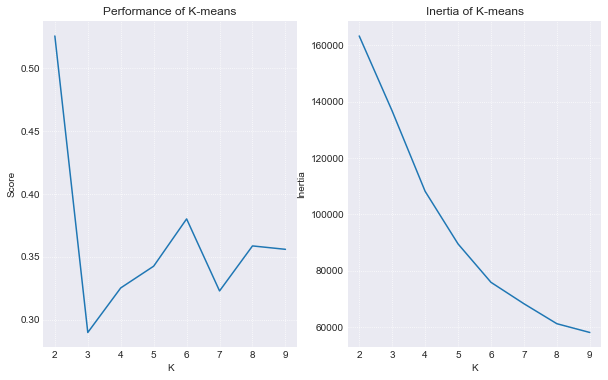

In [78]:
score = []
inertia = []
nums=range(2,10)

for n_clusters in range(2,10):
    kmeans = KMeans(n_clusters = n_clusters, random_state=888)
    kmeans.fit(data_class)
    inertia.append(kmeans.inertia_)
    score.append(silhouette_score(data_class, kmeans.labels_, 
                                  sample_size=128, metric='euclidean'))

plt.figure(figsize=(10, 6))

plt.style.use('seaborn-darkgrid')
plt.subplot(121)
plt.plot(nums,score)
plt.grid(linestyle=':')
plt.xlabel('K')
plt.ylabel('Score')
plt.title('Performance of K-means')

plt.subplot(122)
plt.plot(nums,inertia)
plt.grid(linestyle=':')
plt.xlabel('K')
plt.ylabel('Inertia')
plt.title('Inertia of K-means')
plt.show()

In [79]:
# k = 6 is the best 
k = 6

model_KM = KMeans(n_clusters=k)
model_KM.fit(data_class) 

print(model_KM.labels_) 

KMeans(n_clusters=6)

[0 0 0 ... 3 2 3]


In [80]:
centers = pd.DataFrame(model_KM.cluster_centers_,columns=data_class.columns)
labels = pd.DataFrame(model_KM.labels_,columns=["cluster_class"]) 

In [81]:
# each class numbers
labels_count = pd.DataFrame(labels.value_counts(),columns=["cluster_num"]).sort_index()
labels_count = labels_count.reset_index()

# each class numbers and the information of CMASL model
data_cluster = pd.concat([labels_count,centers],axis=1)
data_cluster["cluster_class"] = ["class_1","class_2","class_3","class_4","class_5","class_6"]
data_cluster

,cluster_class,cluster_num,C,M,A,S,T
0,class_1,5659,-0.218828,0.075537,0.313688,-0.227904,1.782962
1,class_2,1395,-0.114658,3.300728,0.133906,-0.074866,-0.072260
2,class_3,9322,-0.255118,-0.252971,-1.288250,-0.220537,-0.298799
3,class_4,2332,3.753665,0.238278,0.508351,-0.154067,-0.280738
4,class_5,2679,-0.203795,-0.555980,-0.037028,3.214076,0.172612
5,class_6,18663,-0.237469,-0.094478,0.480242,-0.257323,-0.375447


([<matplotlib.patches.Wedge at 0x7fe050700220>,
 [Text(-0.9693798539964704, 0.7073207890807267, 'class_1'),
  Text(-0.7048852678658226, -0.9711522842200021, 'class_2'),
  Text(-0.08952853363488682, -1.196655606958488, 'class_3'),
  Text(0.6294244281762589, -1.0216774878673747, 'class_4'),
  Text(0.9727532777808507, -0.702674220792688, 'class_5'),
  Text(1.140626160152709, 0.3727894349029846, 'class_6')],
 [Text(-0.565471581497941, 0.4126037936304239, '46.60%'),
  Text(-0.4111830729217298, -0.5665054991283345, '3.48%'),
  Text(-0.05222497795368398, -0.6980491040591179, '14.13%'),
  Text(0.3671642497694843, -0.5959785345893018, '5.82%'),
  Text(0.5674394120388295, -0.4098932954624013, '6.69%'),
  Text(0.6653652600890803, 0.2174605036934077, '23.28%')])

(-1.2117943130553683,
 1.2332761048598997,
 -1.2178371513897677,
 1.1981657129417755)

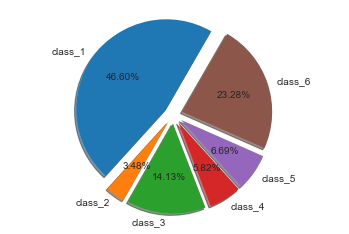

In [82]:
import matplotlib.pyplot as plt

y = ['class_1','class_2','class_3','class_4','class_5','class_6']

x = [18664, 1393, 5659, 2332, 2679, 9323]

explode = (0.1,0.1,0.1,0.1,0.1,0.1)


plt.pie(x,labels=y,autopct='%3.2f%%',explode=explode,shadow=True,startangle=60)

plt.axis('equal')

plt.show()

<Figure size 1080x432 with 0 Axes>

<AxesSubplot:>

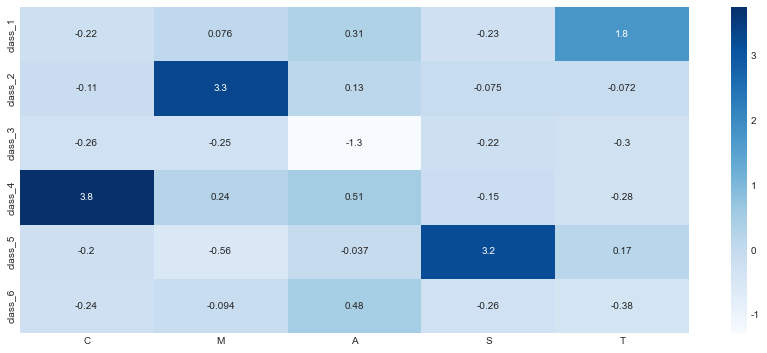

In [83]:
plt.figure(figsize=(15,6))
sns.heatmap(data=centers,xticklabels=centers.columns,yticklabels = data_cluster["cluster_class"],annot=True,cmap="Blues")

In [84]:
import numpy as np
import matplotlib.pyplot as plt

def plot_radar(data):
    kinds = data.iloc[:, 0]
    labels = data.iloc[:, 2:].columns
    centers = pd.concat([data.iloc[:, 2:], data.iloc[:,2]], axis=1)
    centers = np.array(centers)
    n = len(labels)
    angles = np.linspace(0, 2*np.pi, n, endpoint=False)
    labels = np.concatenate((labels, [labels[0]]))
    angles = np.concatenate((angles, [angles[0]]))
    
    fig = plt.figure()
    ax = fig.add_subplot(111, polar=True) 
    
    floor = np.floor(centers.min())    
    ceil = np.ceil(centers.max())     
    for i in np.arange(floor, ceil + 0.5, 0.5):
        ax.plot(angles, [i] * (n + 1), '--', lw=0.5 , color='black')
    
    for i in range(n):
        ax.plot([angles[i], angles[i]], [floor, ceil], '--', lw=0.5, color='black')
    
    for i in range(len(kinds)):
        ax.plot(angles, centers[i], lw=2, label=kinds[i])
        #ax.fill(angles, centers[i])
    
    ax.set_thetagrids(angles * 180 / np.pi, labels) 
    plt.legend(loc='lower right', bbox_to_anchor=(1.5, 0.0)) 
    
    ax.set_theta_zero_location('N')        
    ax.spines['polar'].set_visible(False)  
    ax.grid(False)                         
    ax.set_yticks([]) 
    
    plt.show()

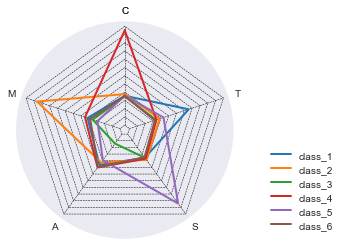

In [85]:
plot_radar(data_cluster)

In [74]:
# Output all information of churns and predict churns
data_class_ID = pd.concat([labels+1, isChurn, data_class],axis=1)
data_class_ID

,cluster_class,id,is_tv_subscriber,is_movie_package_subscriber,subscription_age,bill_avg,reamining_contract,service_failure_count,download_avg,upload_avg,download_over_limit,churn,C,M,A,S,L
0,3,18,0,0,8.22,0,0.00,0,0.0,0.0,0,1,-0.274177,-0.835332,-1.288250,-0.411060,3.506135
1,3,23,1,0,8.91,16,0.00,0,13.7,0.9,0,1,-0.274177,-0.306103,0.133906,-0.411060,3.909781
2,3,27,0,0,6.87,21,0.00,1,0.0,0.0,0,1,-0.274177,-0.472136,-1.288250,0.231974,2.716392
3,3,34,0,0,6.39,0,0.00,0,0.0,0.0,0,1,-0.274177,-0.835332,-1.288250,-0.411060,2.435594
4,3,71,0,0,8.96,18,0.00,0,21.3,2.0,0,1,-0.274177,-0.121046,-1.288250,-0.411060,3.939031
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40045,4,1689648,1,1,0.09,0,1.25,0,0.0,0.0,0,1,3.411973,-0.835332,1.556063,-0.411060,-1.249873
40046,4,1689676,1,0,0.06,1,1.63,0,0.8,0.0,0,1,4.532562,-0.804201,0.133906,-0.411060,-1.267422
40047,4,1689679,1,0,0.02,0,2.19,0,1.5,0.2,0,1,6.183957,-0.805931,0.133906,-0.411060,-1.290822
40048,6,1689733,0,0,0.01,0,0.72,0,0.0,0.0,0,1,1.849045,-0.835332,-1.288250,-0.411060,-1.296672


# Propose specific solutions for different types of churns

(1) class_1: 
   - The number of such customers is relatively large, and the value in "T" dimension is obviously high
   - It shows that this kind of lost customers are old customers with long service life
   - Old customers need to be retained，It is suggested to do some research for them, perhaps they can provide a lot of effective suggestions

(2) class_2: 
   - The value in "T" dimension is obviously high
   - It shows that this kind of customers belong to have obvious consumption ability
   - It is suggested to ipmprove the recommendation system for this kinds of customers, to predict their preferences more accurately and push relevant content at a higher frequency to meet their large needs

(3) class_3: 
   - The number of such customers is relatively large, and there is an obvious shortage value in the "A" dimension
   - It shows that these customers belong to a group with no or few TV and movie subscriptions
   - It is recommended to increase the number of times such customers subscribe to the service, or to push some content such as subscription service guide to encourage them to use it。

(4) class_4: 
   - The value in "C" dimension is obviously high, and the value in "S" and "T" dimensions are low.
   - Reamining contract is the most important factor to avoid this kinds of costomers, and their consumption level, activity and satisfaction are relatively high. In terms of subscription age, they are relatively young, indicating that although there are not many of them, but they are potential customers
   - It is recommended to mark these customers as key customers, and focus on their activities and give them good service feedback

(5) class_5: 
   - The value in "S" dimension is obviously high, and the value in "M" dimension is low.
   - It indicates that these customers have low satisfaction and do not like to consume
   - Maybe these customers don't like this product, and the consumption value they produce is low, the rate of churn is also low, so it is not recommended to invest in them

(6) class_6: 
   - Each dimension is not particularly prominent, the value in "A" dimension is relatively high
   - It shows that they subscribed to TV or movie services, but showed no other characteristics
   - Although the characteristics of this kind of customers are not obvious, but account for the largest proportion of the weight, It is recommended to investigate the causes of churn